In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules

In [2]:
all_data = pd.read_csv('data/groceries - groceries.csv')
all_data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str)] for row in np_data]

In [48]:
unique_items = set()

for row in np_data:
    for elem in row:
        unique_items.add(elem)

In [49]:
print(unique_items)
print(len(unique_items))

{'butter milk', 'white wine', 'liquor (appetizer)', 'dog food', 'hygiene articles', 'soups', 'cereals', 'meat', 'frozen chicken', 'berries', 'nuts/prunes', 'specialty vegetables', 'liquor', 'bathroom cleaner', 'brown bread', 'curd', 'toilet cleaner', 'liqueur', 'packaged fruit/vegetables', 'detergent', 'soft cheese', 'popcorn', 'newspapers', 'Instant food products', 'ready soups', 'photo/film', 'frozen fish', 'kitchen utensil', 'curd cheese', 'light bulbs', 'specialty bar', 'snack products', 'honey', 'cooking chocolate', 'house keeping products', 'cream cheese', 'softener', 'frozen meals', 'pickled vegetables', 'frozen potato products', 'seasonal products', 'whole milk', 'sliced cheese', 'pasta', 'flower soil/fertilizer', 'pet care', 'mayonnaise', 'red/blush wine', 'domestic eggs', 'jam', 'specialty chocolate', 'flower (seeds)', 'instant coffee', 'artif. sweetener', 'tea', 'bottled water', 'tidbits', 'semi-finished bread', 'dishes', 'onions', 'hamburger meat', 'sausage', 'baby food', '

In [78]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [40]:
result = fpgrowth(data, min_support=0.03, use_colnames = True)
result['length'] = np.fromiter(map(len, result['itemsets']), dtype=int)
print(result.sort_values(by=['support'], ascending=False))

     support                    itemsets  length
5   0.255516                (whole milk)       1
8   0.193493          (other vegetables)       1
11  0.183935                (rolls/buns)       1
19  0.174377                      (soda)       1
2   0.139502                    (yogurt)       1
..       ...                         ...     ...
43  0.031012                    (onions)       1
61  0.030605       (rolls/buns, sausage)       2
44  0.030503  (citrus fruit, whole milk)       2
42  0.030402       (specialty chocolate)       1
50  0.030097     (pip fruit, whole milk)       2

[63 rows x 3 columns]


In [32]:
one_item = result.loc[result['length'] == 2]
np.min(one_item.support), np.max(one_item.support)

(0.030096593797661414, 0.07483477376715811)

In [25]:
result_fpmax = fpmax(data, min_support=0.03, use_colnames = True)
result_fpmax['length'] = np.fromiter(map(len, result_fpmax['itemsets']), dtype=int)
print(result_fpmax.sort_values(by=['support']))

     support                             itemsets  length
28  0.030097              (pip fruit, whole milk)       2
0   0.030402                (specialty chocolate)       1
32  0.030503           (citrus fruit, whole milk)       2
34  0.030605                (rolls/buns, sausage)       2
1   0.031012                             (onions)       1
26  0.032232     (whipped/sour cream, whole milk)       2
44  0.032740             (soda, other vegetables)       2
2   0.032944                   (hygiene articles)       1
3   0.033249                            (berries)       1
4   0.033249                     (hamburger meat)       1
33  0.033249                 (pastry, whole milk)       2
5   0.033452                           (UHT-milk)       1
6   0.033859                              (sugar)       1
40  0.034367          (bottled water, whole milk)       2
41  0.034367                 (rolls/buns, yogurt)       2
36  0.035892   (tropical fruit, other vegetables)       2
7   0.037112  

In [34]:
one_item = result_fpmax.loc[result_fpmax['length'] == 2]
np.min(one_item.support), np.max(one_item.support)

(0.030096593797661414, 0.07483477376715811)

<AxesSubplot:xlabel='item'>

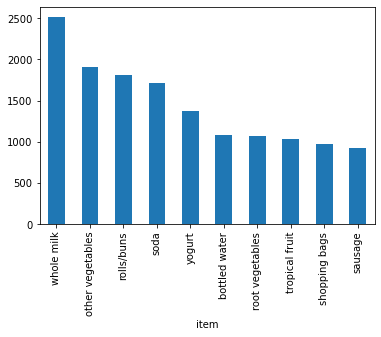

In [38]:
items_number = {}
for row in np_data:
    for elem in row:
        try:
            items_number[elem] += 1
        except KeyError:
            items_number[elem] = 1
            
items_df = pd.DataFrame(items_number.items(), columns=['item', 'number'])
items_df = items_df.sort_values(by='number', ascending=False).reset_index(drop=True)

items_df.head(10).plot(kind='bar', x='item', y='number', legend=False)

In [41]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage',
    'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
    'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data_less = all_data.to_numpy()
np_data_less = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data_less]

te = TransactionEncoder()
te_ary = te.fit(np_data_less).transform(np_data_less)
data = pd.DataFrame(te_ary, columns=te.columns_)

result = fpgrowth(data, min_support=0.03, use_colnames = True)
result['length'] = np.fromiter(map(len, result['itemsets']), dtype=int)

result_fpmax = fpmax(data, min_support=0.03, use_colnames = True)
result_fpmax['length'] = np.fromiter(map(len, result_fpmax['itemsets']), dtype=int)

In [46]:
one_item = result.loc[result['length'] == 2]
np.min(one_item.support), np.max(one_item.support)

(0.030503304524656837, 0.07483477376715811)

Text(0, 0.5, 'Number of itemsets')

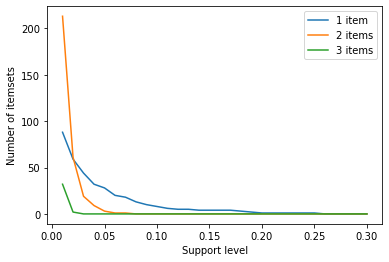

In [63]:
support = np.linspace(0.01, 0.3, 30)
fpgrowth_1_item = []
fpgrowth_2_item = []
fpgrowth_3_item = []
for s in support:    
    result = fpgrowth(data, min_support=s, use_colnames = True)
    result['length'] = np.fromiter(map(len, result['itemsets']), dtype=int)
    fpgrowth_1_item.append(result.loc[result['length'] == 1].shape[0])
    fpgrowth_2_item.append(result.loc[result['length'] == 2].shape[0])
    fpgrowth_3_item.append(result.loc[result['length'] == 3].shape[0])
    
plt.plot(support, fpgrowth_1_item)
plt.plot(support, fpgrowth_2_item)
plt.plot(support, fpgrowth_3_item)
plt.legend(['1 item', '2 items', '3 items'])
plt.xlabel("Support level")
plt.ylabel('Number of itemsets')

Text(0, 0.5, 'Number of itemsets')

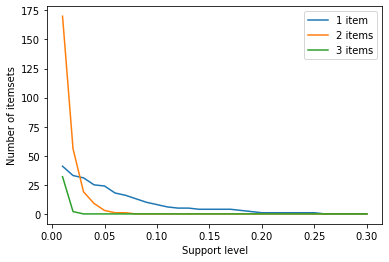

In [64]:
support = np.linspace(0.01, 0.3, 30)
fpgrowth_1_item = []
fpgrowth_2_item = []
fpgrowth_3_item = []
for s in support:    
    result = fpmax(data, min_support=s, use_colnames = True)
    result['length'] = np.fromiter(map(len, result['itemsets']), dtype=int)
    fpgrowth_1_item.append(result.loc[result['length'] == 1].shape[0])
    fpgrowth_2_item.append(result.loc[result['length'] == 2].shape[0])
    fpgrowth_3_item.append(result.loc[result['length'] == 3].shape[0])
    
plt.plot(support, fpgrowth_1_item)
plt.plot(support, fpgrowth_2_item)
plt.plot(support, fpgrowth_3_item)
plt.legend(['1 item', '2 items', '3 items'])
plt.xlabel("Support level")
plt.ylabel('Number of itemsets')

In [75]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

In [79]:
result = fpgrowth(data, min_support=0.05, use_colnames = True)

In [89]:
rules = association_rules(result, min_threshold = 0.35, metric='confidence')
rules
rules.iloc[:, 2:].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.206617,0.383845,0.084907,0.417044,1.097328,0.005698,1.063148
std,0.079763,0.047701,0.029927,0.053484,0.160113,0.010332,0.105078
min,0.124245,0.296214,0.057189,0.351313,0.837619,-0.012801,0.894062
25%,0.150624,0.335079,0.060612,0.366992,1.036260,0.002304,1.025026
50%,0.185864,0.421869,0.071083,0.412655,1.068352,0.006849,1.052495
75%,0.241240,0.421869,0.096859,0.459933,1.169400,0.010985,1.102730
max,0.421869,0.421869,0.148208,0.513776,1.426378,0.028050,1.273671


In [126]:
rules = association_rules(result, min_threshold = 1.04, metric='conviction')
rules.iloc[:, 2:].describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.223054,0.293924,0.073575,0.358605,1.238133,0.013393,1.107953
std,0.084109,0.100411,0.018968,0.111824,0.114270,0.006415,0.068573
min,0.124245,0.124245,0.057189,0.170673,1.068352,0.005359,1.043171
25%,0.180981,0.196335,0.057843,0.270136,1.163885,0.009088,1.059860
50%,0.191099,0.315646,0.062223,0.372114,1.219600,0.012288,1.083949
75%,0.254984,0.356776,0.093838,0.460023,1.313488,0.014413,1.122469
max,0.421869,0.421869,0.110954,0.513776,1.426378,0.028050,1.273671


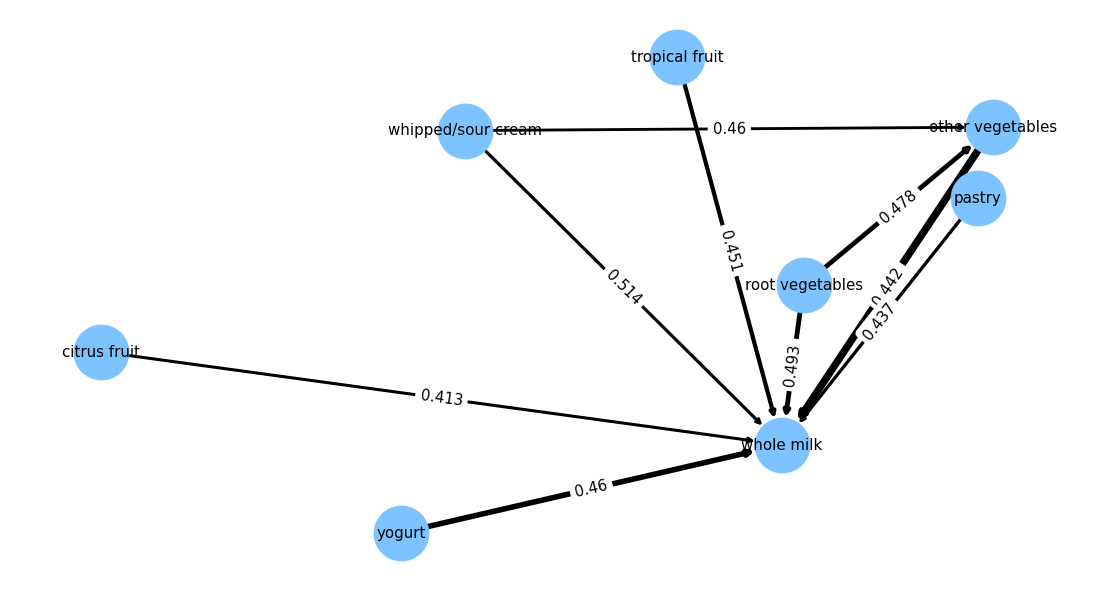

In [134]:
rules = association_rules(result, min_threshold = 0.4, metric='confidence')
digraph = nx.DiGraph()
for i in range(rules.shape[0]):
    digraph.add_edge(
        rules.iloc[i].antecedents,
        rules.iloc[i].consequents,
        weight=rules.iloc[i].support,
        label=round(rules.iloc[i].confidence,3)
    )

plt.figure(figsize=(15, 8))
pos = nx.spring_layout(digraph)
nx.draw(
    digraph,
    pos,
    labels={node: ','.join(node) for node in digraph.nodes()},
    width=[digraph[u][v]['weight']*50 for u,v in digraph.edges()],
    node_size=3000,
    node_color='#7CC3FF',
    font_size=15
)
nx.draw_networkx_edge_labels(
    digraph,
    pos,
    edge_labels=nx.get_edge_attributes(digraph, 'label'),
    font_size=15
)
plt.show()

<AxesSubplot:>

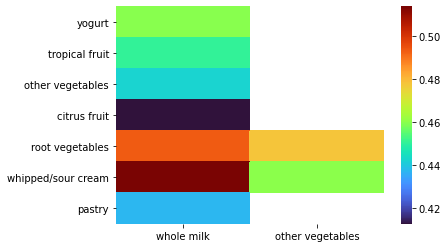

In [137]:
rules_pivot = rules.pivot(index='antecedents', columns='consequents', values='confidence')
rules_pivot.index = list(map(lambda x: list(x)[0], rules_pivot.index))
rules_pivot.columns = list(map(lambda x: list(x)[0], rules_pivot.columns))
sns.heatmap(rules_pivot, cmap='turbo')